In [10]:
!copy "D:\\car_images\\dataset1\\images_jpg\\*" "D:\\car_images\\merged_images\\"
!copy "D:\\car_images\\dataset1\\annotations_txt\\*" "D:\\car_images\\merged_annotations\\"

!copy "D:\\car_images\\dataset2\\test\\images\\*" "D:\\car_images\\merged_images\\"
!copy "D:\\car_images\\dataset2\\valid\\images\\*" "D:\\car_images\\merged_images\\"
!copy "D:\\car_images\\dataset2\\train\\images\\*" "D:\\car_images\\merged_images\\"

!copy "D:\\car_images\\dataset2\\\\test\\labels\\*" "D:\\car_images\\merged_annotations\\"
!copy "D:\\car_images\\dataset2\\\\valid\\labels\\*" "D:\\car_images\\merged_annotations\\"
!copy "D:\\car_images\\dataset2\\\\train\\labels\\*" "D:\\car_images\\merged_annotations\\"

D:\\car_images\\dataset1\\images_jpg\\* 
        0 file(s) copied.


The system cannot find the file specified.


D:\\car_images\\dataset1\\annotations_txt\\Cars0.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars1.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars10.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars100.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars101.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars102.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars103.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars104.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars105.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars106.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars107.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars108.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars109.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars11.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars110.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars111.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars112.txt
D:\\car_images\\dataset1\\annotations_txt\\Cars113.txt
D:\\car_images\\

In [1]:
# move car images to sythesized_images folder
!copy "D:\\car_images\\merged_images\\*" "data\\synthesized_images\\"
!copy "D:\\car_images\\merged_annotations\\*" "data\\synthesized_images\\"


D:\\car_images\\merged_images\\003a5aaf6d17c917_jpg.rf.60e9d14047fc5cd445db13a7bb7264d4.jpg
D:\\car_images\\merged_images\\00723dac8201a83e_jpg.rf.d9a3c0ebd7bf1f3382b17ac4fb609474.jpg
D:\\car_images\\merged_images\\008637722500f239_jpg.rf.ba1b8c4fa65629e6fa77040edbec4a87.jpg
D:\\car_images\\merged_images\\0170ea8e1a33375a_jpg.rf.cf0bc32e208fca4f66def753277ff9e0.jpg
D:\\car_images\\merged_images\\017527da8bfeb97d_jpg.rf.17672ad4e825cf9ef7ec613f6be6347e.jpg
D:\\car_images\\merged_images\\02a6ef3d9bd68e91_jpg.rf.f6172d85f89f248839c13f938daf08f1.jpg
D:\\car_images\\merged_images\\03b7b71e1ffcb7a8_jpg.rf.73fadea76a5c1ed0c8638d5ba36979ec.jpg
D:\\car_images\\merged_images\\044417ca6134604f_jpg.rf.ed7aa69d470a19404ab882bf24cf27fd.jpg
D:\\car_images\\merged_images\\057569768fd6303e_jpg.rf.3e38991d0e4c36542cc100f55c38b78e.jpg
D:\\car_images\\merged_images\\064a8def3049d040_jpg.rf.90625fa7457d5b6a2ed8d1981c370f07.jpg
D:\\car_images\\merged_images\\0673b967f8c68eec_jpg.rf.4faffea417c05ccc1ee969826

In [2]:
import torch
from IPython.display import Image  # for displaying images
import os 
import random
import shutil
from sklearn.model_selection import train_test_split
import xml.etree.ElementTree as ET
from xml.dom import minidom
from tqdm import tqdm
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt

random.seed(108)

C:\Users\megle\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Dictionary that maps class names to IDs
class_name_to_id_mapping = {"license_plate": 0}

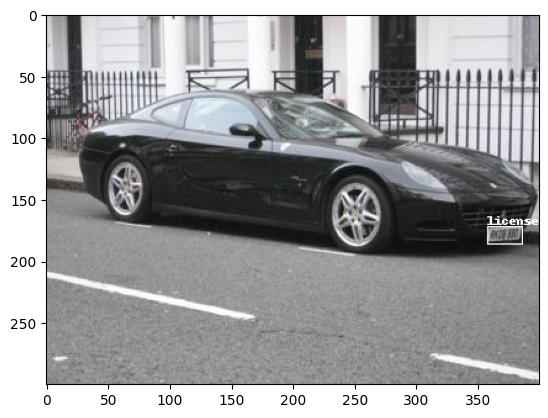

In [4]:
random.seed(0)

class_id_to_name_mapping = dict(zip(class_name_to_id_mapping.values(), class_name_to_id_mapping.keys()))

def plot_bounding_box(image, annotation_list):
    annotations = np.array(annotation_list)
    w, h = image.size
    
    plotted_image = ImageDraw.Draw(image)

    transformed_annotations = np.copy(annotations)
    transformed_annotations[:,[1,3]] = annotations[:,[1,3]] * w
    transformed_annotations[:,[2,4]] = annotations[:,[2,4]] * h 
    
    transformed_annotations[:,1] = transformed_annotations[:,1] - (transformed_annotations[:,3] / 2)
    transformed_annotations[:,2] = transformed_annotations[:,2] - (transformed_annotations[:,4] / 2)
    transformed_annotations[:,3] = transformed_annotations[:,1] + transformed_annotations[:,3]
    transformed_annotations[:,4] = transformed_annotations[:,2] + transformed_annotations[:,4]
    
    for ann in transformed_annotations:
        obj_cls, x0, y0, x1, y1 = ann
        plotted_image.rectangle(((x0,y0), (x1,y1)))
        
        plotted_image.text((x0, y0 - 10), class_id_to_name_mapping[(int(obj_cls))])
    
    plt.imshow(np.array(image))
    plt.show()

images = [os.path.join('data/synthesized_images', x) for x in os.listdir('data/synthesized_images') if x[-3:] == "jpg"]
annotations = [os.path.join('data/synthesized_images', x) for x in os.listdir('data/synthesized_images') if x[-3:] == "txt"]

# Get any random annotation file 
annotation_file = random.choice(annotations)
with open(annotation_file, "r") as file:
    annotation_list = file.read().split("\n")[:-1]
    annotation_list = [x.split(" ") for x in annotation_list]
    annotation_list = [[float(y) for y in x ] for x in annotation_list]

#Get the corresponding image file
image_file = annotation_file.replace("txt", "jpg")
assert os.path.exists(image_file)

#Load the image
image = Image.open(image_file)

#Plot the Bounding Box
plot_bounding_box(image, annotation_list)

In [5]:
images.sort()
annotations.sort()

# Split the dataset into train-valid-test splits 
train_images, val_images, train_annotations, val_annotations = train_test_split(images, annotations, test_size = 0.2, random_state = 1)
val_images, test_images, val_annotations, test_annotations = train_test_split(val_images, val_annotations, test_size = 0.5, random_state = 1)

In [6]:
!mkdir "data\\images" "data\\labels"

In [7]:
!mkdir "data\\images\\train" "data\\images\\val" "data\\images\\test" "data\\labels\\train" "data\\labels\\val" "data\\labels\\test"

In [9]:
import os

dir_name = "D:\\car_images\\merged_images"
test = os.listdir(dir_name)

for item in test:
    if item.endswith(".png"):
        os.remove(os.path.join(dir_name, item))

In [8]:
#Utility function to move images 
def move_files_to_folder(list_of_files, destination_folder):
    for f in list_of_files:
        try:
            shutil.move(f, destination_folder)
        except:
            print(f)
            assert False

# Move the splits into their folders
move_files_to_folder(train_images, 'data/images/train')
move_files_to_folder(val_images, 'data/images/val')
move_files_to_folder(test_images, 'data/images/test')
move_files_to_folder(train_annotations, 'data/labels/train')
move_files_to_folder(val_annotations, 'data/labels/val')
move_files_to_folder(test_annotations, 'data/labels/test')